In [1]:
import numpy as np #importing packages
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets


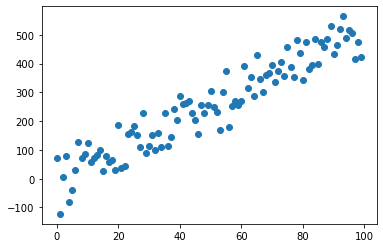

In [2]:
n = 100 #defining no. of points
x = np.arange(0,n) #making an array of 0 to n
c = np.random.normal(0,50,n)
y = 5*x + 3
y1 = 5*x + 3 + c #creating y
plt.scatter(x,y1)
plt.show()

In [3]:
splt = 50 # splitting the data set into training and test
test_x = x[:-splt]
train_x = x[-splt:]
test_y = y1[:-splt]
train_y = y1[-splt:]
test_x, train_x = test_x.reshape(-1,1), train_x.reshape(-1,1)

In [4]:
regr = linear_model.LinearRegression() #defining model
regr.fit(train_x,train_y) #training the regression model using testing data
p_y = regr.predict(test_x) #predicting the y values

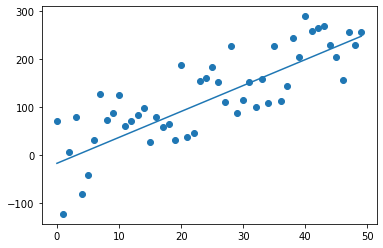

149491.72182635716


In [5]:
plt.scatter(test_x, test_y) #plotting
plt.plot(test_x,p_y)
plt.show()
print(np.sum((p_y - test_y)**2))

In [13]:
def sgd(x,y,a,n): #defining the Stochastic Gradient Descent function
    m = 1
    c = 0
    for i in range(0,n):
        j = np.random.randint(0,np.size(y))
        y_p = m*x[j] + c
        err = y_p - y[j]
        m = m-a*2*m*err
        c = c-a*2*err
    return(m,c)
print(sgd(x,y1,0.002,100))
        

(5.948302456468481, 11.58479822007771)


In [7]:
def minibatch(x,y,a,n,bs): #defining minibatch 
    m=1
    c=0
    nb = int(len(y)/bs)
    for i in range(n):
        for j in range(0,nb):
            y_p = np.zeros(bs+1)
            err = np.zeros(bs+1)
            for k in range(j*bs, j*bs+bs):
                y_p[k-j*bs] = m*x[k] + c
                err[k-j*bs] = y_p[k - j*bs] - y[k]
            gd = sum(err)
            m = m - a*2*m*gd/bs
            c = c - a*2*gd/bs
    return(m,c)

In [8]:
print(minibatch(x,y1,0.002,100,10))

(4.952254881707558, 5.220769376153042)


In [9]:
def batch(x,y,a,n): #defining batch GD
    m = 1
    c = 0
    y_p = m*x + c
    err = y_p - y
    for i in range(0,n):
        y_p = m*x + c
        err = y_p - y
        m = m - a*2*m*sum(err)/len(x)
        c = c - a*2*sum(err)/len(x)
    return(m,c)
        

In [10]:
print(batch(x,y1,0.002,100))

(5.107222900679787, 2.085035685005324)


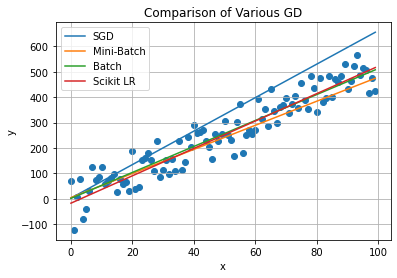

In [14]:
m_sgd, c_sgd = sgd(x,y1,0.001,100)
m_mb, c_mb = minibatch(x,y1,0.001,100,5)
m_b, c_b = batch(x,y1,0.001,100)

y_sgd = m_sgd*x + c_sgd
y_mb = m_mb*x + c_mb
y_b = m_b*x + c_b
y_lr = regr.predict(x.reshape(-1,1))

plt.plot(x,y_sgd,label="SGD")
plt.plot(x,y_mb, label="Mini-Batch")
plt.plot(x,y_b, label="Batch")
plt.plot(x,y_lr, label="Scikit LR")
plt.scatter(x,y1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Comparison of Various GD")
plt.legend()
plt.grid()
plt.show()

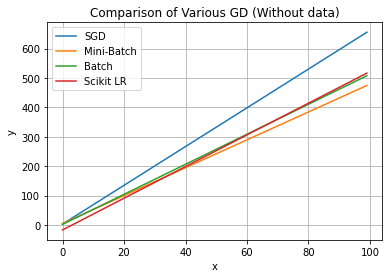

In [15]:
plt.plot(x,y_sgd,label="SGD")
plt.plot(x,y_mb, label="Mini-Batch")
plt.plot(x,y_b, label="Batch")
plt.plot(x,y_lr, label="Scikit LR")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Comparison of Various GD (Without data)")
plt.legend()
plt.grid()
plt.show()

In [17]:
print("sgd loss")
print(sum((y_sgd -y1)**2)/100)
print("Mini-Batch loss")
print(sum((y_mb -y1)**2)/100)
print("Batch loss")
print(sum((y_b -y1)**2)/100)
print("Scikit Linear Regression")
print(sum((y_lr -y1)**2)/100)

sgd loss
9864.66511434096
Mini-Batch loss
3125.942233146967
Batch loss
2725.8203978225633
Scikit Linear Regression
2770.732760756283
